##Dependencies

In [ ]:
import ee
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta

In [ ]:
!pip install geemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.8 MB/s eta 0:00:00
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none

In [ ]:
ee.Authenticate()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=ltkOQmijXUcmtBDGgPHusvS8Pak70U3RfqMCdq3ow90&tc=FHk6wLE_sFofIAHSQ6TDV0iXIyfAsihKNy2iF9T-jsw&cc=R-0r3I6OA7EB5grze-EGs03nzGduXnLZh7fSnSeYMZA

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AbUR2VNRryOdAf_rvhfCI3IrUFFciHRk_V4QHX9mCHAETZ7GVDk9hLpyEPA

Successfully saved authorization token.


##For Disrict Recognition

In [ ]:
import geemap

In [ ]:
from geemap.plot import center_zoom_to_xy_range
import ipywidgets as widgets
from ipyleaflet import WidgetControl
from geemap import geojson_to_ee

Map = geemap.Map(center =[23.8402, 87.6186], zoom_start=9)

dc = Map.draw_control

roi = []
# Handle draw events
def handle_draw(self, action, geo_json):
    geometry = geo_json['geometry']
    if geometry['type'] == 'Polygon':
        coordinates = geometry['coordinates'][0]
        roi.append(coordinates)
        print("Polygon coordinates:", coordinates)
dc.on_draw(handle_draw)
Map

Map(center=[23.8402, 87.6186], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(chi…

Polygon coordinates: [[87.093766, 23.805921], [87.095311, 23.796497], [87.10149, 23.799167], [87.093766, 23.805921]]


In [ ]:
roi

[[[87.772324, 24.249469],
  [87.324695, 23.908438],
  [87.978288, 23.812988],
  [87.772324, 24.249469]]]

##For Field Recognition

In [ ]:
##Drawaing the Map
Map = geemap.Map(center =[23.8402, 87.6186], zoom_start=10)

##Defining the area of interest
polygon = ee.Geometry.Polygon(roi)


#Collecting the images
sentinel1 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-06-01', '2022-06-15').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
sentinel2 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-06-16', '2022-06-30').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
sentinel3 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-07-01', '2022-07-15').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
sentinel4 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-07-16', '2022-07-31').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
sentinel5 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-08-01', '2022-08-15').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
sentinel6 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-08-16', '2022-08-31').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
sentinel7 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-09-01', '2022-09-15').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
sentinel8 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-09-16', '2022-09-30').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
sentinel9 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-10-01', '2022-10-15').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
sentinel10 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-10-16', '2022-10-31').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
"""
sentinel11 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-11-16', '2022-11-30').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
sentinel12 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-12-01', '2022-12-15').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
sentinel13 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-12-16', '2022-12-31').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
sentinel14 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2023-01-01', '2023-01-15').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
sentinel15 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2023-04-11', '2023-04-25').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
"""



##Making the bands
image1 = sentinel1.select('VH').mean().rename('VH1')
image2 = sentinel2.select('VH').mean().rename('VH2')
image3 = sentinel3.select('VH').mean().rename('VH3')
image4 = sentinel4.select('VH').mean().rename('VH4')
image5 = sentinel5.select('VH').mean().rename('VH5')
image6 = sentinel6.select('VH').mean().rename('VH6')
image7 = sentinel7.select('VH').mean().rename('VH7')
image8 = sentinel8.select('VH').mean().rename('VH8')
image9 = sentinel9.select('VH').mean().rename('VH9')
image10 = sentinel10.select('VH').mean().rename('VH10')
"""
image11 = sentinel10.select('VH').mean().rename('VH11')
image12 = sentinel10.select('VH').mean().rename('VH12')
image13 = sentinel10.select('VH').mean().rename('VH13')
image14 = sentinel10.select('VH').mean().rename('VH14')
image15 = sentinel10.select('VH').mean().rename('VH15')
"""

stacked = image1.addBands([image2,image3,image4,image5,image6,image7,image8,image9,image10]).clip(polygon)

stacked_scaled = stacked.multiply(10).add(350).uint8();
bands = ['VH4', 'VH5', 'VH9'];
display = {'bands': bands, 'min': 0, 'max': 220};

Map.addLayer(stacked_scaled, display, 'stacked')

# Get the DrawControl
dc = Map.draw_control

# List of recognised Fields
polygon_coordinates = []

# Handle draw events
def handle_draw(self, action, geo_json):
    geometry = geo_json['geometry']
    if geometry['type'] == 'Polygon':
        coordinates = geometry['coordinates'][0]
        polygon_coordinates.append(coordinates)
        print("Polygon coordinates:", coordinates)

dc.on_draw(handle_draw)


Map

Map(center=[23.8402, 87.6186], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(chi…

In [ ]:
# Polygon Coordeinates generated by Handle_Draw in above Map
polygon_coordinates


[]

##For Generating our training dataset

In [ ]:
# function to get the rice fields of requirement
def generate_fields (polygon_coordinates):
  fields = []
  for field in polygon_coordinates :
    field = np.array(field)
    field = np.transpose(field)
    for i in range(10):
      coeff = np.random.rand(field.shape[1])
      coeff /= coeff.sum()
      fieldpoint = np.dot(field, coeff)
      fields.append(list(fieldpoint))
  return fields

In [ ]:
# Getting the rice fields
fields = generate_fields(polygon_coordinates) #Here the polygon_coordinates contains the primary rice fields
fields

[[87.40442085879204, 23.82802139398859],
 [87.40270133821018, 23.830422531295024],
 [87.40300003204493, 23.82826772328812],
 [87.40365032565998, 23.82846068947192],
 [87.4036399497094, 23.82730378993009],
 [87.40209828074775, 23.82724670837026],
 [87.40445931318148, 23.827635164292182],
 [87.4034556225535, 23.82693413476507],
 [87.40158051472429, 23.829737567177578],
 [87.40306422571612, 23.827623192020408],
 [87.16154825072898, 23.750994835642476],
 [87.15915625403724, 23.75117676408688],
 [87.16115224833766, 23.750727999575787],
 [87.16179311217579, 23.749920061383065],
 [87.16041521551621, 23.751462805282586],
 [87.15882339035637, 23.750513540585352],
 [87.15994946227559, 23.75077071754452],
 [87.15937330857595, 23.75149390730936],
 [87.1580614384183, 23.751166858800875],
 [87.16052978625653, 23.751305584926143],
 [87.41450906876962, 23.84017670055755],
 [87.4137891773697, 23.84239511388632],
 [87.41476387668496, 23.84163516671151],
 [87.41454762297556, 23.840210718469123],
 [87.414

In [ ]:
# Making the dataframe which will contain our training dataset
df = pd.DataFrame(np.array(fields)).rename({0 : 'latitude', 1 : 'longitude'}, axis = 1)
df.shape


(50, 2)

In [ ]:
# Adding Rice-Groups Class
df['Rice-Groups']=None

# Columns
column=['latitude', 'longitude', 'Rice-Groups','VH1', 'VH2', 'VH3', 'VH4',
       'VH5', 'VH6', 'VH7', 'VH8', 'VH9', 'VH10']

In [ ]:
for i in range(1,11):
  ls = []
  for j in range(df.shape[0]):
    pointOfInterest = ee.Geometry.Point([df.iloc[j][0],df.iloc[j][1]])
    bandValues = stacked_scaled.reduceRegion(
      reducer = ee.Reducer.first(),  # You can choose a different reducer if needed
      geometry = pointOfInterest,
      scale = 30,  # Specify the scale/resolution for the analysis
      maxPixels = 30  # Set a limit for the number of pixels to be processed
    )
    ls.append(ee.Number(bandValues.get('VH'+str(i))).toInt().getInfo())
  df['VH'+str(i)] = pd.Series(np.array(ls))
  df['Rice-Groups']='River'


**Each Class DataFrame**

In [ ]:
df

,latitude,longitude,VH1,Rice-Groups,VH2,VH3,VH4,VH5,VH6,VH7,VH8,VH9,VH10
0,87.404421,23.828021,99,River,74,89,77,83,77,82,70,86,96
1,87.402701,23.830423,78,River,76,91,79,79,66,70,74,84,78
2,87.403000,23.828268,94,River,103,70,89,96,89,77,87,77,94
3,87.403650,23.828461,87,River,84,81,74,81,76,86,70,85,82
4,87.403640,23.827304,89,River,75,73,80,73,78,78,93,78,75
5,87.402098,23.827247,94,River,68,71,79,89,73,73,92,77,72
6,87.404459,23.827635,90,River,77,83,80,73,82,79,85,78,69
7,87.403456,23.826934,93,River,70,92,79,75,83,93,82,74,79
8,87.401581,23.829738,97,River,77,83,79,79,80,80,86,84,78
9,87.403064,23.827623,105,River,92,101,73,87,96,55,82,89,88


## Our Required DataSet


In [ ]:
# Read The csv File
df1 = pd.read_csv('Train_data_Birbhum.csv', index_col = False)
df1.drop(columns = 'Unnamed: 0',inplace=True)

In [ ]:
# Concatenate the DataFrames vertically
df1 = pd.concat([df1,df])

# # Reset the index of the concatenated DataFrame
df1.reset_index(drop=True, inplace=True)

In [ ]:
# No of elements in each Rice group
ds = df1['Rice-Groups'].value_counts()
ds

In [ ]:
df1.to_csv("Train_data_Birbhum.csv")

## Plotting Of Each Rice Group With Respect to Band Values

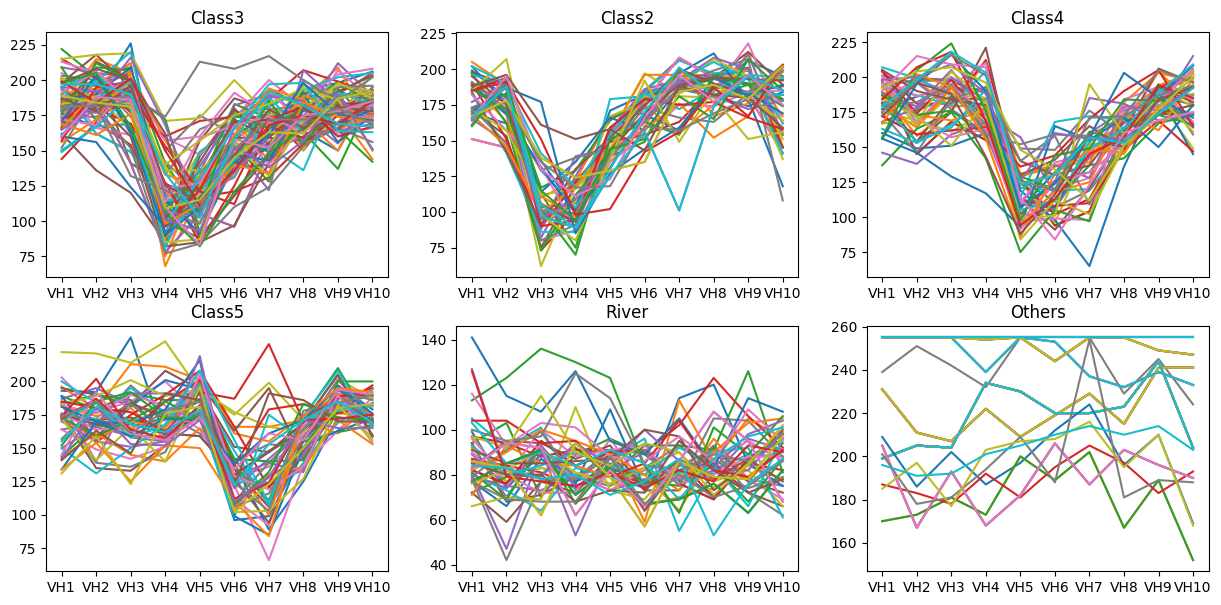

In [ ]:
import matplotlib.pyplot as plt
figure, ax = plt.subplots(2,3)
k =0
for j in list(ds.index):
  for i in range(int(df1[df1["Rice-Groups"] == j ].shape[0])):
    ax[int(k/3)][k%3].plot((df1[df1["Rice-Groups"] == j].iloc[i])[3:]) 
  ax[int(k/3)][k%3].title.set_text(str(j))
  k = k+1

##Trainning Algorithm

In [ ]:
#index = df[df["Rice-Groups"] == 'Class1'].shape[0]
df1.drop(index = df1.index[:1], axis=0, inplace = True)

In [ ]:
df1.head()

,latitude,longitude,Rice-Groups,VH1,VH2,VH3,VH4,VH5,VH6,VH7,VH8,VH9,VH10
40,87.962833,23.894296,Class2,199,180,136,101,171,182,192,187,206,195
41,87.963958,23.891833,Class2,205,189,110,122,166,175,155,175,212,146
42,87.962359,23.894750,Class2,186,181,113,75,155,165,193,187,194,179
43,87.962447,23.894257,Class2,197,186,73,100,159,175,195,196,201,145
44,87.962476,23.893117,Class2,189,168,82,125,167,169,199,184,210,154


In [ ]:
# Machine Learning Model : Random Forest Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X = df1.drop('Rice-Groups',axis=1)
y = df1['Rice-Groups']
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.8, random_state=69)

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=200, max_leaf_nodes=128, min_impurity_decrease = 0.1, criterion = 'gini')
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)

RandomForestClassifier(max_leaf_nodes=128, min_impurity_decrease=0.1,
                       n_estimators=200)

In [ ]:
# Predicted Data Value Counts
pd.Series(y_pred).value_counts()

Class2    14
Class3    14
Others    11
Class4    11
River      9
Class5     5
dtype: int64

In [ ]:
# Total Test Data Value Counts
pd.Series(y_test).value_counts()

Class3    15
Class2    13
Class4    12
Others    10
River      9
Class5     5
Name: Rice-Groups, dtype: int64

In [ ]:
# Accuracy Of The Model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.96875

##Sentinel2/NDVI

In [ ]:


#Defining the area of interest
polygon = ee.Geometry.Polygon(roi)

sentinel_group = {}

for i in range(1,47):
  sentinel_group['sentinel'+str(i)] = (
    ee.ImageCollection("COPERNICUS/S2_SR")
    .filterDate(datetime.strptime('2022-01-01', '%Y-%m-%d')+timedelta(days = (i-1)*8),datetime.strptime('2022-01-08', '%Y-%m-%d')+timedelta(days = (i-1)*8))
    .filterBounds(polygon)
)

def addNDVI(image): 
  return image.addBands(image.normalizedDifference(['B8','B4'] ).rename('NDVI')) 

for i in range(1,47):
   sentinel_group['sentinel'+str(i)] =  sentinel_group['sentinel'+str(i)].map(addNDVI)


# qualityMosaic() function is used to obtain the greenest pixel composite image for each image collection based on the NDVI band
greenest = {}

for i in range(1,47):
   greenest['greenest'+str(i)] =  sentinel_group['sentinel'+str(i)].qualityMosaic('NDVI').select(['NDVI']).clip(polygon)

#  Making the bands
image_dict = {}

for i in range(1,47):
   image_dict['image'+str(i)] =  greenest['greenest'+str(i)].select(['NDVI']).rename('NDVI'+str(i))



stacked_S2 = image_dict['image1']
stacked_S2 = stacked_S2.addBands(image_dict['image'+str(2)])
# stacked_S2 = stacked_S2.addBands(image_dict['image'+str(4)])
for i in range(3,47):
  stacked_S2 = stacked_S2.addBands(image_dict['image'+str(i)])


# stacked_S2 = image_dict['image1'].addBands([image_dict['image'+str(2)]]).addBands([image_dict['image'+str(3)]]).addBands([image_dict['image'+str(4)]])


# for i in range(5,44):
#   stacked_S2 = stacked_S2.addBands([image_dict['image'+str(i)]])

stacked_scaled_S2 = stacked_S2.multiply(100).add(100).uint8()



In [ ]:
stacked_S2.getInfo()

{'type': 'Image',
 'bands': [{'id': 'NDVI1',
   'data_type': {'type': 'PixelType',
    'precision': 'float',
    'min': -1,
    'max': 1},
   'dimensions': [2, 2],
   'origin': [86, 23],
   'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0]},
  {'id': 'NDVI2',
   'data_type': {'type': 'PixelType',
    'precision': 'float',
    'min': -1,
    'max': 1},
   'dimensions': [2, 2],
   'origin': [86, 23],
   'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0]},
  {'id': 'NDVI3',
   'data_type': {'type': 'PixelType',
    'precision': 'float',
    'min': -1,
    'max': 1},
   'dimensions': [2, 2],
   'origin': [86, 23],
   'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0]},
  {'id': 'NDVI4',
   'data_type': {'type': 'PixelType',
    'precision': 'float',
    'min': -1,
    'max': 1},
   'dimensions': [2, 2],
   'origin': [86, 23],
   'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0]},
  {'id': 'NDVI5',
   'data_type': {'type': 'PixelType',
    'precision': 'flo

In [ ]:
def generate_from_roi(field):
  fields = []
  field = np.array(field)
  field = np.transpose(field)
  for i in range(5):
    coeff = np.random.rand(field.shape[1])
    coeff /= coeff.sum()
    fieldpoint = np.dot(field, coeff)
    fields.append(list(fieldpoint))
  return fields

In [ ]:
# Getting the rice fields
fields = generate_from_roi(roi[0]) #Here the polygon_coordinates contains the primary rice fields
len(fields)

5

In [ ]:
# Making the dataframe which will contain our training dataset
df_S2 = pd.DataFrame(np.array(fields)).rename({0 : 'longitude', 1 : 'latitude'}, axis = 1)
df_S2.head(5)

,longitude,latitude
0,87.097547,23.801155
1,87.097370,23.799915
2,87.096250,23.803314
3,87.095160,23.801042
4,87.097689,23.801404


In [ ]:
for i in range(1,47):
  ls = []
  for j in range(df_S2.shape[0]):
    pointOfInterest = ee.Geometry.Point([df_S2.iloc[j][0],df_S2.iloc[j][1]])
    bandValues_S2 = stacked_scaled_S2.select('NDVI'+str(i)).reduceRegion(
      reducer = ee.Reducer.mean(),  # You can choose a different reducer if needed
      geometry = pointOfInterest,
      scale = 30,  # Specify the scale/resolution for the analysis
      maxPixels = 30  # Set a limit for the number of pixels to be processed
    ).get('NDVI'+str(i))
    if (ee.Number(bandValues_S2)).getInfo() is None:
      ls.append(np.nan)
    else:
      ls.append((ee.Number(bandValues_S2)).toInt().getInfo())
  df_S2['NDVI'+str(i)] = pd.Series(np.array(ls))


In [ ]:
df_S2

,longitude,latitude,NDVI1,NDVI2,NDVI3,NDVI4,NDVI5,NDVI6,NDVI7,NDVI8,...,NDVI37,NDVI38,NDVI39,NDVI40,NDVI41,NDVI42,NDVI43,NDVI44,NDVI45,NDVI46
0,87.097547,23.801155,107,108,107,107,106,107,108,107,...,95,97,95,104,107,105,106,96,106,107
1,87.097370,23.799915,101,106,104,99,105,107,104,106,...,105,99,98,110,107,106,106,103,107,107
2,87.096250,23.803314,107,108,108,106,106,107,109,107,...,107,106,106,108,107,106,107,106,106,106
3,87.095160,23.801042,107,108,107,106,106,107,108,107,...,102,101,89,107,108,105,106,98,107,107
4,87.097689,23.801404,107,108,107,107,106,108,108,107,...,102,97,98,105,106,104,106,101,105,106


In [ ]:
df_S2.isnull().sum()

##Sentinel2/EVI

**EVI**


In [59]:
#Drawaing the Map
Map = geemap.Map(center =[23.8402, 87.6186], zoom_start=10)

#Defining the area of interest
polygon = ee.Geometry.Polygon(roi)

sentinel_group = {}

for i in range(1,47):
  sentinel_group['sentinel'+str(i)] = (
    ee.ImageCollection("COPERNICUS/S2_SR")
    .filterDate(datetime.strptime('2022-01-01', '%Y-%m-%d')+timedelta(days = (i-1)*8),datetime.strptime('2022-01-08', '%Y-%m-%d')+timedelta(days = (i-1)*8))
    .filterBounds(polygon)
)

def addEVI(image):
  evi = image.expression(
    '2.5 * ((NIR - RED) / (NIR + 6 * RED - 7.5 * BLUE + 1))', {
      'NIR': image.select('B5'),
      'RED': image.select('B4'),
      'BLUE': image.select('B2')
  }) 
  return image.addBands(evi.rename('EVI')) 


for i in range(1,47):
   sentinel_group['sentinel'+str(i)] =  sentinel_group['sentinel'+str(i)].map(addEVI)


# qualityMosaic() function is used to obtain the greenest pixel composite image for each image collection based on the EVI band
greenest = {}

for i in range(1,47):
   greenest['greenest'+str(i)] =  sentinel_group['sentinel'+str(i)].qualityMosaic('EVI').select(['EVI']).clip(polygon)

#  Making the bands
image_dict = {}

for i in range(1,47):
   image_dict['image'+str(i)] =  greenest['greenest'+str(i)].select(['EVI']).rename('EVI'+str(i))



stacked_S2 = image_dict['image1'].addBands([image_dict['image'+str(2)]]).addBands([image_dict['image'+str(3)]])

for i in range(4,47):
  stacked_S2 = stacked_S2.addBands([image_dict['image'+str(i)]])

stacked_scaled_S2 = stacked_S2.multiply(100).add(100).uint8()



In [ ]:
stacked_scaled_S2.getInfo()

In [58]:
for i in range(1,47):
  ls = []
  for j in range(df_S2.shape[0]):
    pointOfInterest = ee.Geometry.Point([df_S2.iloc[j][0],df_S2.iloc[j][1]])
    bandValues_S2 = stacked_scaled_S2.select('EVI'+str(i)).reduceRegion(
      reducer = ee.Reducer.mean(),  # You can choose a different reducer if needed
      geometry = pointOfInterest,
      scale = 30,  # Specify the scale/resolution for the analysis
      maxPixels = 30  # Set a limit for the number of pixels to be processed
    ).get('EVI'+str(i))
    if (ee.Number(bandValues_S2)).getInfo() is None:
      ls.append(np.nan)
    else:
      ls.append((ee.Number(bandValues_S2)).toInt().getInfo())
  df_S2['EVI'+str(i)] = pd.Series(np.array(ls))


In [92]:
ds = df_S2.isnull().any()
for i in ds.index:
  if (ds[i]):
    print(i)

##Sentinel2/LSWI

In [64]:
#Drawaing the Map
Map = geemap.Map(center =[23.8402, 87.6186], zoom_start=10)

#Defining the area of interest
polygon = ee.Geometry.Polygon(roi)

sentinel_group = {}

for i in range(1,47):
  sentinel_group['sentinel'+str(i)] = (
    ee.ImageCollection("COPERNICUS/S2_SR")
    .filterDate(datetime.strptime('2022-01-01', '%Y-%m-%d')+timedelta(days = (i-1)*8),datetime.strptime('2022-01-08', '%Y-%m-%d')+timedelta(days = (i-1)*8))
    .filterBounds(polygon)
)

def addLSWI(image): 
  return image.addBands(image.normalizedDifference(['B9','B4'] ).rename('LSWI'))


for i in range(1,47):
   sentinel_group['sentinel'+str(i)] =  sentinel_group['sentinel'+str(i)].map(addLSWI)


# qualityMosaic() function is used to obtain the greenest pixel composite image for each image collection based on the LSWI band
greenest = {}

for i in range(1,47):
   greenest['greenest'+str(i)] =  sentinel_group['sentinel'+str(i)].qualityMosaic('LSWI').select(['LSWI']).clip(polygon)

#  Making the bands
image_dict = {}

for i in range(1,47):
   image_dict['image'+str(i)] =  greenest['greenest'+str(i)].select(['LSWI']).rename('LSWI'+str(i))



stacked_S2 = image_dict['image1'].addBands([image_dict['image'+str(2)]]).addBands([image_dict['image'+str(3)]])

for i in range(4,47):
  stacked_S2 = stacked_S2.addBands([image_dict['image'+str(i)]])

stacked_scaled_S2 = stacked_S2.multiply(100).add(100).uint8()



In [65]:
for i in range(1,47):
  ls = []
  for j in range(df_S2.shape[0]):
    pointOfInterest = ee.Geometry.Point([df_S2.iloc[j][0],df_S2.iloc[j][1]])
    bandValues_S2 = stacked_scaled_S2.select('LSWI'+str(i)).reduceRegion(
      reducer = ee.Reducer.mean(),  # You can choose a different reducer if needed
      geometry = pointOfInterest,
      scale = 30,  # Specify the scale/resolution for the analysis
      maxPixels = 30  # Set a limit for the number of pixels to be processed
    ).get('LSWI'+str(i))
    if (ee.Number(bandValues_S2)).getInfo() is None:
      ls.append(np.nan)
    else:
      ls.append((ee.Number(bandValues_S2)).toInt().getInfo())
  df_S2['LSWI'+str(i)] = pd.Series(np.array(ls))

In [66]:
df_S2

,longitude,latitude,NDVI1,NDVI2,NDVI3,NDVI4,NDVI5,NDVI6,NDVI7,NDVI8,...,LSWI37,LSWI38,LSWI39,LSWI40,LSWI41,LSWI42,LSWI43,LSWI44,LSWI45,LSWI46
0,87.097547,23.801155,107,108,107,107,106,107,108,107,...,113,127,119,122,121,120,117,121,118,116
1,87.097370,23.799915,101,106,104,99,105,107,104,106,...,98,129,92,109,112,105,107,93,103,104
2,87.096250,23.803314,107,108,108,106,106,107,109,107,...,121,129,108,110,118,108,110,107,108,107
3,87.095160,23.801042,107,108,107,106,106,107,108,107,...,105,146,102,115,124,114,117,107,111,111
4,87.097689,23.801404,107,108,107,107,106,108,108,107,...,105,126,111,114,117,108,109,105,107,109


In [67]:
ds = df_S2.isnull().any()
for i in ds.index:
  if (ds[i]):
    print(i)

In [68]:
df_S2.to_csv("Sentinel2_evi_lswi_ndvi.csv")

##Dataset

In [69]:
df_S2_1 = df_S2.apply(lambda x : (x-100)/100)

In [70]:
df_S2_1[['longitude','latitude']] = df_S2_1[['longitude','latitude']].apply(lambda x : (x*100)+100)

In [71]:
df_S2_1.head()

,longitude,latitude,NDVI1,NDVI2,NDVI3,NDVI4,NDVI5,NDVI6,NDVI7,NDVI8,...,LSWI37,LSWI38,LSWI39,LSWI40,LSWI41,LSWI42,LSWI43,LSWI44,LSWI45,LSWI46
0,87.097547,23.801155,0.07,0.08,0.07,0.07,0.06,0.07,0.08,0.07,...,0.13,0.27,0.19,0.22,0.21,0.20,0.17,0.21,0.18,0.16
1,87.097370,23.799915,0.01,0.06,0.04,-0.01,0.05,0.07,0.04,0.06,...,-0.02,0.29,-0.08,0.09,0.12,0.05,0.07,-0.07,0.03,0.04
2,87.096250,23.803314,0.07,0.08,0.08,0.06,0.06,0.07,0.09,0.07,...,0.21,0.29,0.08,0.10,0.18,0.08,0.10,0.07,0.08,0.07
3,87.095160,23.801042,0.07,0.08,0.07,0.06,0.06,0.07,0.08,0.07,...,0.05,0.46,0.02,0.15,0.24,0.14,0.17,0.07,0.11,0.11
4,87.097689,23.801404,0.07,0.08,0.07,0.07,0.06,0.08,0.08,0.07,...,0.05,0.26,0.11,0.14,0.17,0.08,0.09,0.05,0.07,0.09


import altair as alt
from google.colab import autoviz
df_7574761178276081594 = autoviz.get_registered_df('df_7574761178276081594')

def histogram(df, colname, maxbins=20, width=100, height=50):
  return (alt.Chart(df).mark_bar()
          .encode(
              x=alt.X(colname, bin=alt.Bin(maxbins=maxbins)),
              y=alt.Y('count()', axis=alt.Axis(title='count')),
          )
          .properties(width=width, height=height))  #  Pixels.

chart = histogram(df_7574761178276081594, *['index'], **{})
chart

import altair as alt
from google.colab import autoviz
df_7574761178276081594 = autoviz.get_registered_df('df_7574761178276081594')

def histogram(df, colname, maxbins=20, width=100, height=50):
  return (alt.Chart(df).mark_bar()
          .encode(
              x=alt.X(colname, bin=alt.Bin(maxbins=maxbins)),
              y=alt.Y('count()', axis=alt.Axis(title='count')),
          )
          .properties(width=width, height=height))  #  Pixels.

chart = histogram(df_7574761178276081594, *['longitude'], **{})
chart

import altair as alt
from google.colab import autoviz
df_7574761178276081594 = autoviz.get_registered_df('df_7574761178276081594')

def histogram(df, colname, maxbins=20, width=100, height=50):
  return (alt.Chart(df).mark_bar()
          .encode(
              x=alt.X(colname, bin=alt.Bin(maxbins=maxbins)),
              y=alt.Y('count()', axis=alt.Axis(title='count')),
          )
          .properties(width=width, height=height))  #  Pixels.

chart = histogram(df_7574761178276081594, *['latitude'], **{})
chart

import altair as alt
from google.colab import autoviz
df_7574761178276081594 = autoviz.get_registered_df('df_7574761178276081594')

def histogram(df, colname, maxbins=20, width=100, height=50):
  return (alt.Chart(df).mark_bar()
          .encode(
              x=alt.X(colname, bin=alt.Bin(maxbins=maxbins)),
              y=alt.Y('count()', axis=alt.Axis(title='count')),
          )
          .properties(width=width, height=height))  #  Pixels.

chart = histogram(df_7574761178276081594, *['NDVI1'], **{})
chart

import altair as alt
from google.colab import autoviz
df_7574761178276081594 = autoviz.get_registered_df('df_7574761178276081594')

def value_plot(df, y, sort_ascending=False, width=100, height=50):
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  return (alt.Chart(df.reset_index()).mark_line()
          .encode(x=alt.X('index', title=''), y=alt.X(y, title='value'))
          .properties(width=width, height=height, title=y))

chart = value_plot(df_7574761178276081594, *['index'], **{})
chart

import altair as alt
from google.colab import autoviz
df_7574761178276081594 = autoviz.get_registered_df('df_7574761178276081594')

def value_plot(df, y, sort_ascending=False, width=100, height=50):
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  return (alt.Chart(df.reset_index()).mark_line()
          .encode(x=alt.X('index', title=''), y=alt.X(y, title='value'))
          .properties(width=width, height=height, title=y))

chart = value_plot(df_7574761178276081594, *['longitude'], **{})
chart

import altair as alt
from google.colab import autoviz
df_7574761178276081594 = autoviz.get_registered_df('df_7574761178276081594')

def value_plot(df, y, sort_ascending=False, width=100, height=50):
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  return (alt.Chart(df.reset_index()).mark_line()
          .encode(x=alt.X('index', title=''), y=alt.X(y, title='value'))
          .properties(width=width, height=height, title=y))

chart = value_plot(df_7574761178276081594, *['latitude'], **{})
chart

import altair as alt
from google.colab import autoviz
df_7574761178276081594 = autoviz.get_registered_df('df_7574761178276081594')

def value_plot(df, y, sort_ascending=False, width=100, height=50):
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  return (alt.Chart(df.reset_index()).mark_line()
          .encode(x=alt.X('index', title=''), y=alt.X(y, title='value'))
          .properties(width=width, height=height, title=y))

chart = value_plot(df_7574761178276081594, *['NDVI1'], **{})
chart

import altair as alt
from google.colab import autoviz
df_7574761178276081594 = autoviz.get_registered_df('df_7574761178276081594')

def linked_scatter_plots(
    df, colname_pairs, color='steelblue', deselected_color='lightgray',
    opacity=0.8, deselected_opacity=0.4, width=150, height=150):
  interval = alt.selection_interval()
  scatter = (alt.Chart(df).mark_circle()
             .encode(
                 color=alt.condition(
                     interval, alt.value(color), alt.value(deselected_color)),
                 opacity=alt.condition(
                     interval, alt.value(opacity),
                     alt.value(deselected_opacity)))
             .properties(
                 selection=interval, width=width, height=height))
  return alt.hconcat(*[scatter.encode(x=x, y=y) for x, y in colname_pairs])

chart = linked_scatter_plots(df_7574761178276081594, *[[['index', 'longitude'], ['longitude', 'latitude'], ['latitude', 'NDVI1'], ['NDVI1', 'NDVI2']]], **{})
chart

In [72]:
df1=df_S2_1

In [73]:
df1

,longitude,latitude,NDVI1,NDVI2,NDVI3,NDVI4,NDVI5,NDVI6,NDVI7,NDVI8,...,LSWI37,LSWI38,LSWI39,LSWI40,LSWI41,LSWI42,LSWI43,LSWI44,LSWI45,LSWI46
0,87.097547,23.801155,0.07,0.08,0.07,0.07,0.06,0.07,0.08,0.07,...,0.13,0.27,0.19,0.22,0.21,0.20,0.17,0.21,0.18,0.16
1,87.097370,23.799915,0.01,0.06,0.04,-0.01,0.05,0.07,0.04,0.06,...,-0.02,0.29,-0.08,0.09,0.12,0.05,0.07,-0.07,0.03,0.04
2,87.096250,23.803314,0.07,0.08,0.08,0.06,0.06,0.07,0.09,0.07,...,0.21,0.29,0.08,0.10,0.18,0.08,0.10,0.07,0.08,0.07
3,87.095160,23.801042,0.07,0.08,0.07,0.06,0.06,0.07,0.08,0.07,...,0.05,0.46,0.02,0.15,0.24,0.14,0.17,0.07,0.11,0.11
4,87.097689,23.801404,0.07,0.08,0.07,0.07,0.06,0.08,0.08,0.07,...,0.05,0.26,0.11,0.14,0.17,0.08,0.09,0.05,0.07,0.09


##  Functions For Field Selections


In [74]:
def water_body(index):
  flag = 0
  for i in range(1,38):
    for j in range(i, i+10):
      if ((df1.loc[index]['NDVI'+str(j)] < 0.1) & (df1.loc[index]['NDVI'+str(j)] < df1.loc[index]['LSWI'+str(j)])):
        pass
      else:
        flag = 1
    if not flag:
      return True
  return False



In [80]:
water_body(4)

False

In [ ]:
#@title
(df1.loc[1]['NDVI'+str(1)] < 0.1) & (df1.loc[1]['NDVI'+str(1)] < df1.loc[1]['LSWI'+str(1)])

False

In [ ]:
#@title
df1.append({'latitude' : 26.1824375, 'longitude' : 91.6693046}, ignore_index = True)

In [81]:
def Ever_green(index):
  flag = 0
  for i in range(1,28):
    for j in range(i, i+20):
      if ((df1.loc[index]['NDVI'+str(j)] > 0.7)): #& (df1.loc[index]['NDVI'+str(j)] < df1.loc[index]['LSWI'+str(j)])):
        pass
      else:
        flag = 1
    if not flag:
      return True
  return False

In [82]:
Ever_green(1)

False

In [83]:
l1 = []
def flooding(index):
  flag = 0
  for i in range(1,47):
    if((df1.loc[index]['LSWI'+str(i)]+0.05 > df1.loc[index]['EVI'+str(i)]) or (df1.loc[index]['LSWI'+str(i)]+0.05 > df1.loc[index]['NDVI'+str(i)])):
      l1.append(i)

  if len(l1) == 0:
    return False
  else:
    return True
      

In [84]:
def paddy_detect(index):
  flag = 0
  evi_max = 0

  for i in range(1,47):
    evi_max = max(df1.loc[index]['EVI'+str(i)], evi_max)


  for i in l1:
    if((i+4) <= 46):
      if(df1.loc[index]['EVI'+str(i+4)] >= (evi_max*0.5)):
        return True
  return False
    


In [91]:
flooding(3)

True

In [93]:
l1

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 2,
 3,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 2,
 3,
 12,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 22,
 23,
 24,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 38,
 40,
 41,
 42,
 43,
 45,
 46,
 2,
 3,
 10,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46]

In [86]:
paddy_detect(4)

True